In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import utils


In [2]:
os.environ["CDF_LIB"] = "~/CDF/lib"

twins_dir = '../data/twins/'
supermag_dir = '../data/supermag/'
regions_dict = '../identifying_regions/outputs/twins_era_identified_regions_min_2.pkl'
regions_stat_dict = '../identifying_regions/outputs/twins_era_stats_dict_radius_regions_min_2.pkl'

region_numbers = [83, 143, 223, 44, 173, 321, 366, 383, 122, 279, 14, 95, 237, 26, 166, 86,
						387, 61, 202, 287, 207, 361, 137, 184, 36, 19, 9, 163, 16, 270, 194, 82,
						62, 327, 293, 241, 107, 55, 111]

mlt_span = 1
percentile = 0.99

In [3]:

# loading all the datasets and dictonaries
if os.path.exists('outputs/twins_maps_with_footpoints.pkl'):
	with open('outputs/twins_maps_with_footpoints.pkl', 'rb') as f:
		twins = pickle.load(f)
else:
	twins = utils.loading_twins_maps()

regions, stats = utils.loading_dicts()
solarwind = utils.loading_solarwind()

# reduce the regions dict to be only the ones that have keys in the region_numbers list
regions = {f'region_{reg}': regions[f'region_{reg}'] for reg in region_numbers}

percentile_dataframe = pd.DataFrame()

# Getting regions data for each region
for region in regions.keys():

	# getting dbdt and rsd data for the region
	temp_df = utils.combining_regional_dfs(regions[region]['station'], stats[region])

	# getting the mean latitude for the region and attaching it to the regions dictionary
	mean_lat = utils.getting_mean_lat(regions[region]['station'])
	regions[region]['mean_lat'] = mean_lat

	# segmenting the rsd data for calculating percentiles
	percentile_dataframe = pd.concat([percentile_dataframe, temp_df[['rsd', 'MLT']]], axis=0, ignore_index=True)

	# attaching the regional data to the regions dictionary with only the keys that are in the twins dictionary
	regions[region]['combined_dfs'] = temp_df[temp_df.index.isin(twins.keys())]


# calculating the percentiles for each region
mlt_perc = utils.calculate_percentiles(percentile_dataframe, mlt_span, percentile)

# Attaching the algorithm maps to the twins dictionary
algorithm_maps = utils.loading_algorithm_maps()

data_dict = {'twins_maps':twins, 'solarwind':solarwind, 'regions':regions,
				'algorithm_maps':algorithm_maps, 'percentiles':mlt_perc}

Loading twins maps....
Loading regional dictionaries....
Loading solar wind data....
Combining regional data....
Loading station ROE....
Loading station BFE....
Loading station WNG....
Loading station ROE....
Loading station BFE....
Loading station WNG....
Combining regional data....
Loading station BBG....
Loading station LYR....
Loading station HOR....
Loading station NAL....
Loading station HRN....
Loading station BBG....
Loading station LYR....
Loading station HOR....
Loading station NAL....
Loading station HRN....
Combining regional data....
Loading station BBG....
Loading station LYR....
Loading station HOR....
Loading station NAL....
Loading station HRN....
Loading station HOP....
Loading station BBG....
Loading station LYR....
Loading station HOR....
Loading station NAL....
Loading station HRN....
Loading station HOP....
Combining regional data....
Loading station AND....
Loading station KIL....
Loading station TRO....
Loading station ABK....
Loading station KIR....
Loading sta

/home/mcoughlan/projects/examining_twins_and_supermag/utils.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlt_df['max'] = mlt_df.max(axis=1)
/home/mcoughlan/projects/examining_twins_and_supermag/utils.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlt_df.dropna(inplace=True, subset=['max'])
/home/mcoughlan/projects/examining_twins_and_supermag/utils.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [4]:
data_dict['regions']['region_83']

{'shape': <POLYGON ((8.55 55.17, 11.67 55.62, 9.07 53.75, 8.55 55.17))>,
 'station': ['ROE', 'BFE', 'WNG'],
 'num_stations_in_region': 3,
 'mean_lat': 51.407284,
 'combined_dfs':                      ROE_dbdt   BFE_dbdt  WNG_dbdt  reg_mean    reg_max  \
 2009-07-21 00:00:00  0.100000   0.141421  0.000000  0.080474   0.141421   
 2009-07-21 00:10:00  1.140175   0.854400  1.000000  0.998192   1.140175   
 2009-07-21 00:20:00  0.447214   0.141421  1.000000  0.529545   1.000000   
 2009-07-21 00:40:00  0.300000   0.223607  0.000000  0.174536   0.300000   
 2009-07-21 01:00:00  0.860233   0.565685  1.004988  0.810302   1.004988   
 ...                       ...        ...       ...       ...        ...   
 2017-11-07 07:30:00  1.063015   1.220656  1.081665  1.121778   1.220656   
 2017-11-07 07:40:00  0.670820   0.806226  1.204159  0.893735   1.204159   
 2017-11-07 08:50:00  1.063015   0.989949  0.565685  0.872883   1.063015   
 2017-11-07 09:00:00  1.486607   1.612452  2.900000  1.999686 

In [11]:
start_date = pd.to_datetime('2009-07-20')
end_date = pd.to_datetime('2017-12-31')

# splitting up the regions based on MLT value into 1 degree bins
mlt_bins = np.arange(0, 24, 1)
mlt_dict = {}
for mlt in mlt_bins:
	mlt_df = pd.DataFrame(index=pd.date_range(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), freq='min'))
	for region in regions.values():
		temp_df = region['combined_dfs'][region['combined_dfs']['MLT'].between(mlt, mlt+1)]
		mlt_df = pd.concat([mlt_df, temp_df['rsd']], axis=1, ignore_index=False)
	mlt_df.columns = [f'region_{reg}' for reg in region_numbers]
	mlt_df['max'] = mlt_df.max(axis=1)
	mlt_df['region_max'] = mlt_df.idxmax(axis=1)
	
	mlt_df.dropna(inplace=True, subset=['max'])
	
	# creates a new column that gets the mean lat of the region that has the max rsd value
	mlt_df['mean_lat'] = mlt_df['region_max'].apply(lambda x: regions[x]['mean_lat'])

	mlt_dict[f'{mlt}'] = mlt_df
	print(f"Finished MLT {mlt}")

Finished MLT 0
Finished MLT 1
Finished MLT 2
Finished MLT 3
Finished MLT 4
Finished MLT 5
Finished MLT 6
Finished MLT 7
Finished MLT 8
Finished MLT 9
Finished MLT 10
Finished MLT 11
Finished MLT 12
Finished MLT 13
Finished MLT 14
Finished MLT 15
Finished MLT 16
Finished MLT 17
Finished MLT 18
Finished MLT 19
Finished MLT 20
Finished MLT 21
Finished MLT 22
Finished MLT 23


In [12]:
mlt_dict['0'].head()

,region_83,region_143,region_223,region_44,region_173,region_321,region_366,region_383,region_122,region_279,...,region_62,region_327,region_293,region_241,region_107,region_55,region_111,max,region_max,mean_lat
2009-07-21 02:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.345202,NaN,0.860108,NaN,NaN,NaN,NaN,1.345202,region_62,75.404732
2009-07-21 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.463201,3.545001,2.773592,3.045581,NaN,NaN,NaN,3.545001,region_327,71.543030
2009-07-21 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.175379,2.822702,2.235576,2.822702,NaN,NaN,NaN,2.822702,region_327,71.543030
2009-07-21 03:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.539231,1.751363,2.609942,NaN,NaN,NaN,2.609942,region_241,72.879387
2009-07-21 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.37185,0.36313,0.785610,region_194,60.951233


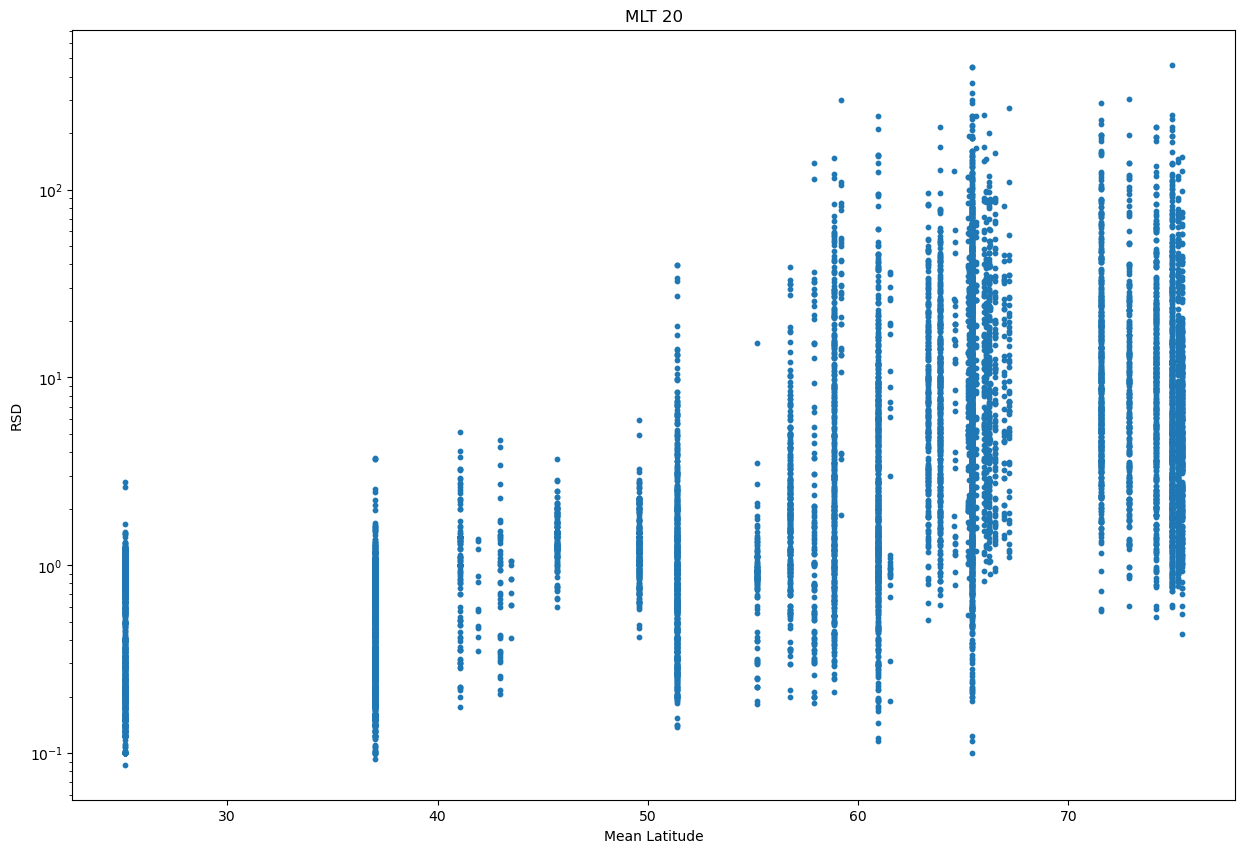

In [18]:
mlt = 20
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_title(f"MLT {mlt}")
plt.scatter(mlt_dict[f'{mlt}']['mean_lat'], mlt_dict[f'{mlt}']['max'], s=10)
ax.set_xlabel('Mean Latitude')
ax.set_ylabel('RSD')
#setting y axis to log scale
ax.set_yscale('log')
plt.show()